#1.Setup

In [ ]:
!pip uninstall -y -q tensorflow keras tensorflow-estimator tensorflow-text
!pip install protobuf~=3.20.3
!pip install -q tensorflow_datasets
!pip install -q -U tensorflow-text tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Grammatical_Error_Correction/

/content/drive/MyDrive/Grammatical_Error_Correction


#2.Data Loading

In [ ]:
CSV_PATH = './Data/csv_data/c4_200m/data.csv'

In [ ]:
df = pd.read_csv(CSV_PATH)

In [ ]:
df.shape

(192090, 2)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_validation = train_test_split(df, test_size=0.25)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((df_train['input'].values, df_train['target'].values))
validation_dataset = tf.data.Dataset.from_tensor_slices((df_validation['input'].values, df_validation['target'].values))

In [ ]:
# Train Dataset Example
for input, target in train_dataset.batch(1).take(3):
    for inp in input.numpy():
        print("Incorrect Sentence:", inp.decode('utf-8'))

    for tgt in target.numpy():
        print("Correct Sentence  :", tgt.decode('utf-8'))
    print()

Incorrect Sentence: restore and renew your complexion with this ultra luxe facial oil around that is worn with powerful antioxidants and natural oils in a radiant youthful looking complexion
Correct Sentence  : Restore and renew your complexion with this ultra luxe facial oil packed with powerful antioxidants and natural oils for a radiant youthfullooking complexion

Incorrect Sentence: Radiation experts at Lawrence Livermore National Laboratory can not explain how particles of plutonium one of the world is most dangerous radioactive elements ended up in popular Big Trees Park adjacent to a school and a half a miles from their site
Correct Sentence  : Radiation experts at Lawrence Livermore National Laboratory can not explain how particles of plutonium one of the world is most dangerous radioactive elements ended up in popular Big Trees Park adjacent to a school and a halfmile from their site

Incorrect Sentence: Why is six month changed period before student is allowed to transfer to 

In [ ]:
# Validation Dataset Example
for input, target in validation_dataset.batch(1).take(3):
    for inp in input.numpy():
        print("Incorrect Sentence:", inp.decode('utf-8'))

    for tgt in target.numpy():
        print("Correct Sentence  :", tgt.decode('utf-8'))
    print()

Incorrect Sentence: Heskey Danny Murphy and Smicer all test Grazing but it was the players who then came close to scoring just above the halfhour when Kevin Watson is twicetaken freekick was headed on to the top of the crossbar by Scott
Correct Sentence  : Heskey Danny Murphy and Smicer all tested Gray but it was the visitors who then came close to scoring just past the halfhour when Kevin Watson is twicetaken freekick was headed on to the top of the crossbar by Scott

Incorrect Sentence: The service was fine with the repair to the crack on my windshield was repaired however that days later the crack re emerged
Correct Sentence  : The service was fine and the repair to the crack on my windshield was repaired however a few days later the crack re emerged

Incorrect Sentence: I am a mother now and I do not vaccinate my children because I am vaccine injured
Correct Sentence  : I am a mother now and I chose not to vaccinate my children because I am vaccine injured



#3.Loading Tokenizer

In [ ]:
model_name = './Data/Tokenizer/c4_200m_tokenizer'
# model_name = './Data/Tokenizer/c4_200m_tokenizer_v2.0'
tokenizers = tf.saved_model.load(model_name)

In [ ]:
[item for item in dir(tokenizers.inp) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [ ]:
print("Input Vocab Size:  ", tokenizers.inp.get_vocab_size().numpy())
print("Target Vocab Size: ",tokenizers.tgt.get_vocab_size().numpy())

Input Vocab Size:   54699
Target Vocab Size:  47986


In [ ]:
print('Example String Input:')
for inc in input.numpy():
    print(inc.decode('utf-8'))

Example String Input:
I am a mother now and I do not vaccinate my children because I am vaccine injured


In [ ]:
encoded = tokenizers.inp.tokenize(input)

print('Text to Sequence of Tokens: ')
for row in encoded.to_list():
    print(row)

Text to Sequence of Tokens: 
[2, 12, 157, 30, 1435, 141, 57, 12, 94, 80, 19284, 99, 391, 211, 12, 157, 9982, 4730, 3]


In [ ]:
round_trip = tokenizers.inp.detokenize(encoded)

print('Sequence to Text :')
for line in round_trip.numpy():
    print(line.decode('utf-8'))

Sequence to Text :
I am a mother now and I do not vaccinate my children because I am vaccine injured


In [ ]:
print('> This is the text split into tokens:')
tokens = tokenizers.inp.lookup(encoded)
tokens

> This is the text split into tokens:


<tf.RaggedTensor [[b'[START]', b'I', b'am', b'a', b'mother', b'now', b'and', b'I', b'do',
  b'not', b'vaccinate', b'my', b'children', b'because', b'I', b'am',
  b'vaccine', b'injured', b'[END]']]>

In [ ]:
lengths = []

for inp_examples, tgt_examples in train_dataset.batch(512):
  inp_tokens = tokenizers.inp.tokenize(inp_examples)
  lengths.append(inp_tokens.row_lengths())

  tgt_tokens = tokenizers.tgt.tokenize(tgt_examples)
  lengths.append(tgt_tokens.row_lengths())
  print('.', end='', flush=True)

..........................................................................................................................................................................................................................................................................................

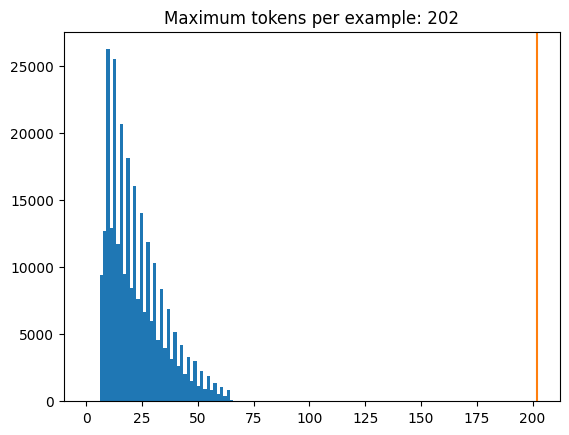

In [ ]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 150, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

#4.Data Batching

In [ ]:
MAX_TOKENS=32
def prepare_batch(inp, tgt):
    inp = tokenizers.inp.tokenize(inp)      # Output is ragged.
    inp = inp[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    inp = inp.to_tensor()  # Convert to 0-padded dense Tensor

    tgt = tokenizers.tgt.tokenize(tgt)
    tgt = tgt[:, :(MAX_TOKENS+1)]
    tgt_inputs = tgt[:, :-1].to_tensor()  # Drop the [END] tokens
    tgt_labels = tgt[:, 1:].to_tensor()   # Drop the [START] tokens

    return (inp, tgt_inputs), tgt_labels

In [ ]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [ ]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

In [ ]:
# Create training and validation set batches.
train_batches = make_batches(train_dataset)
val_batches = make_batches(validation_dataset)

In [ ]:
for (inp, tgt), tgt_labels in train_batches.take(1):
  break

print(inp.shape)
print(tgt.shape)
print(tgt_labels.shape)

(128, 32)
(128, 32)
(128, 32)


In [ ]:
print(tgt[0])
print(tgt_labels[0])

tf.Tensor(
[    2  7351  7408    61    30  9547   721    66  6069  9547   215    58
  1036    60 14483 13426     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(32,), dtype=int64)
tf.Tensor(
[ 7351  7408    61    30  9547   721    66  6069  9547   215    58  1036
    60 14483 13426     3     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(32,), dtype=int64)


#5.Model Components

##5.1.Embedding and Positional Encoding

In [ ]:
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = tf.cast(x, tf.int32)
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


In [ ]:
embed_inp = PositionalEmbedding(vocab_size=tokenizers.inp.get_vocab_size().numpy(), d_model=512)
embed_tgt = PositionalEmbedding(vocab_size=tokenizers.tgt.get_vocab_size().numpy(), d_model=512)

In [ ]:
inp_emb = embed_inp(inp)
tgt_emb = embed_tgt(tgt)

In [ ]:
inp_emb._keras_mask

<tf.Tensor: shape=(128, 32), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])>

In [ ]:
inp_emb._keras_mask

<tf.Tensor: shape=(128, 32), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])>

##5.2.Attention Layer

In [ ]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

In [ ]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [ ]:
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(inp_emb.shape)
print(tgt_emb.shape)
print(sample_ca(inp_emb, tgt_emb).shape)

(128, 32, 512)
(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'cross_attention' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [ ]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(inp_emb.shape)
print(sample_gsa(inp_emb).shape)

(128, 32, 512)
(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'global_self_attention' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [ ]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(tgt_emb.shape)
print(sample_csa(tgt_emb).shape)

(128, 32, 512)
(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'causal_self_attention' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
out1 = sample_csa(embed_tgt(tgt[:, :3]))
out2 = sample_csa(embed_tgt(tgt))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

5.9604645e-07

##5.3.Feed Forward Layer

In [ ]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x


In [ ]:
sample_ffn = FeedForward(512, 2048)

print(tgt_emb.shape)
print(sample_ffn(tgt_emb).shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'sequential' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(128, 32, 512)
(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'feed_forward' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


##5.4.Encoder Block

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

In [ ]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

print(inp_emb.shape)
print(sample_encoder_layer(inp_emb).shape)

(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'global_self_attention_1' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'encoder_layer' (of type EncoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.

In [ ]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(inp, training=False)

# Print the shape.
print(inp.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'global_self_attention_2' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'encoder_layer_1' (of type EncoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(128, 32)
(128, 32, 512)


##5.5.Decoder Block

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

In [ ]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

sample_decoder_layer_output = sample_decoder_layer(
    x=tgt_emb, context=inp_emb)

print(tgt_emb.shape)
print(inp_emb.shape)
print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'causal_self_attention_1' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(128, 32, 512)
(128, 32, 512)
(128, 32, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'decoder_layer' (of type DecoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x

In [ ]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=tgt,
    context=inp_emb)

# Print the shapes.
print(tgt.shape)
print(inp_emb.shape)
print(output.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'causal_self_attention_2' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'decoder_layer_1' (of type DecoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(128, 32)
(128, 32, 512)
(128, 32, 512)


In [ ]:
sample_decoder.last_attn_scores.shape  # (batch, heads, target_seq, input_seq)

TensorShape([128, 8, 32, 32])

##5.6.Transformer Block

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

#6.Model Hyperparameters

In [ ]:
# Parameters Used in the orignal Transformer Paper
# num_layers = 6
# d_model = 512
# dff = 2048
# num_heads = 8
# dropout_rate = 0.1

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.inp.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.tgt.get_vocab_size().numpy(),
    dropout_rate=dropout_rate)

In [ ]:
output = transformer((inp, tgt))

print(inp.shape)
print(tgt.shape)
print(output.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'global_self_attention_6' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'encoder_layer_5' (of type EncoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'causal_self_attention_6' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the 

(128, 32)
(128, 32)
(128, 32, 47986)


In [ ]:
attn_scores = transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)  # (batch, heads, target_seq, input_seq)

(128, 8, 32, 32)


In [ ]:
transformer.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_1 (Encoder)                  │ ?                           │       9,640,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_1 (Decoder)                  │ ?                           │      10,892,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ ?                           │       6,190,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,722,546 (101.94 MB)

 Trainable params: 26,722,546 (101.94 MB)

 Non-trainable params: 0 (0.00 B)

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the original Transformer [paper](https://arxiv.org/abs/1706.03762).

$$\Large{lrate = d_{model}^{-0.5} * \min(step{\_}num^{-0.5}, step{\_}num \cdot warmup{\_}steps^{-1.5})}$$

#7.Model Training

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

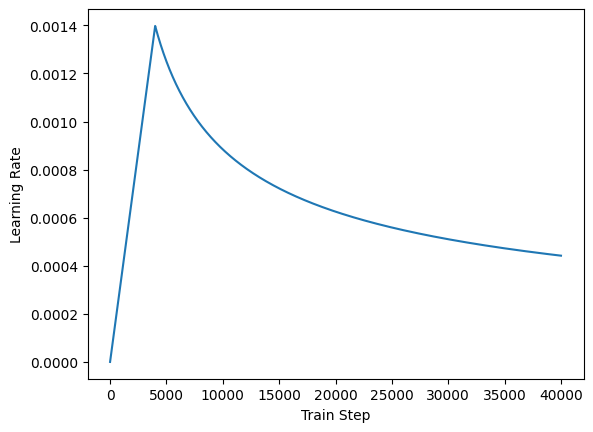

In [ ]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

##7.1. Optimizer and Loss Function

In [ ]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [ ]:
transformer.fit(train_batches, epochs=10, validation_data=val_batches)

Epoch 1/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 341s 254ms/step - loss: 9.3229 - masked_accuracy: 0.0780 - val_loss: 5.4195 - val_masked_accuracy: 0.3431
Epoch 2/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 254s 225ms/step - loss: 4.3976 - masked_accuracy: 0.4524 - val_loss: 1.9483 - val_masked_accuracy: 0.7349
Epoch 3/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 254s 225ms/step - loss: 1.3928 - masked_accuracy: 0.8040 - val_loss: 0.5416 - val_masked_accuracy: 0.9074
Epoch 4/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 262s 225ms/step - loss: 0.4078 - masked_accuracy: 0.9240 - val_loss: 0.2626 - val_masked_accuracy: 0.9480
Epoch 5/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 244s 210ms/step - loss: 0.2140 - masked_accuracy: 0.9588 - val_loss: 0.1653 - val_masked_accuracy: 0.9722
Epoch 6/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 254s 225ms/step - loss: 0.1661 - masked_accuracy: 0.9736 - val_loss: 0.1575 - val_masked_accuracy: 0.9780
Epoch 7/10
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 262s 225ms/step - loss: 0.1532 - masked_accuracy: 0.9797 - val_loss: 0

In [ ]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    # The input sentence is Incorrect, hence adding the `[START]` and `[END]` tokens.
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.inp.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # As the output is Correct, initialize the output with the
    # English `[START]` token.
    start_end = self.tokenizers.tgt.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a Python list), so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions = self.transformer([encoder_input, output], training=False)

      # Select the last token from the `seq_len` dimension.
      predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Concatenate the `predicted_id` to the output which is given to the
      # decoder as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # The output shape is `(1, tokens)`.
    text = tokenizers.tgt.detokenize(output)[0]  # Shape: `()`.

    tokens = tokenizers.tgt.lookup(output)[0]

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

In [ ]:
translator = Translator(tokenizers, transformer)

In [ ]:
def print_translation(sentence, tokens, ground_truth):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

In [ ]:
sentence = 'What will I do this day ? I will carry my homework from the study .'
ground_truth = 'What will I do today ? I will carry my homework from the study .'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Input:         : What will I do this day ? I will carry my homework from the study .
Prediction     : What will I do this day [UNK] We can carry my homework from the your study The study by [UNK]
Ground truth   : What will I do today ? I will carry my homework from the study .


In [ ]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [ ]:
head = 0
# Shape: `(batch=1, num_heads, seq_len_q, seq_len_k)`.
attention_heads = tf.squeeze(attention_weights, 0)
attention = attention_heads[head]
attention.shape

TensorShape([21, 18])

In [ ]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.inp.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.inp.lookup(in_tokens)[0]
in_tokens

<tf.Tensor: shape=(18,), dtype=string, numpy=
array([b'[START]', b'What', b'will', b'I', b'do', b'this', b'day',
       b'[UNK]', b'I', b'will', b'carry', b'my', b'homework', b'from',
       b'the', b'study', b'[UNK]', b'[END]'], dtype=object)>

In [ ]:
translated_tokens

<tf.Tensor: shape=(22,), dtype=string, numpy=
array([b'[START]', b'What', b'will', b'I', b'do', b'this', b'day',
       b'[UNK]', b'We', b'can', b'carry', b'my', b'homework', b'from',
       b'the', b'your', b'study', b'The', b'study', b'by', b'[UNK]',
       b'[END]'], dtype=object)>

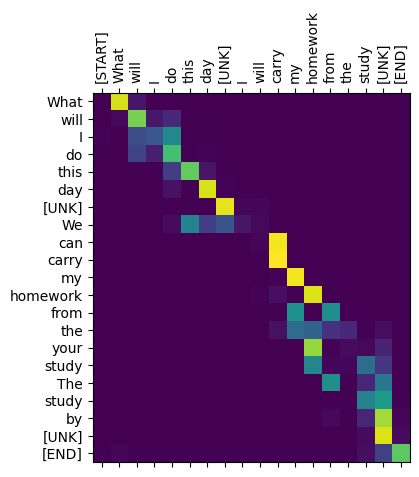

In [ ]:
plot_attention_head(in_tokens, translated_tokens, attention)

In [ ]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.inp.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.inp.lookup(in_tokens)[0]

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

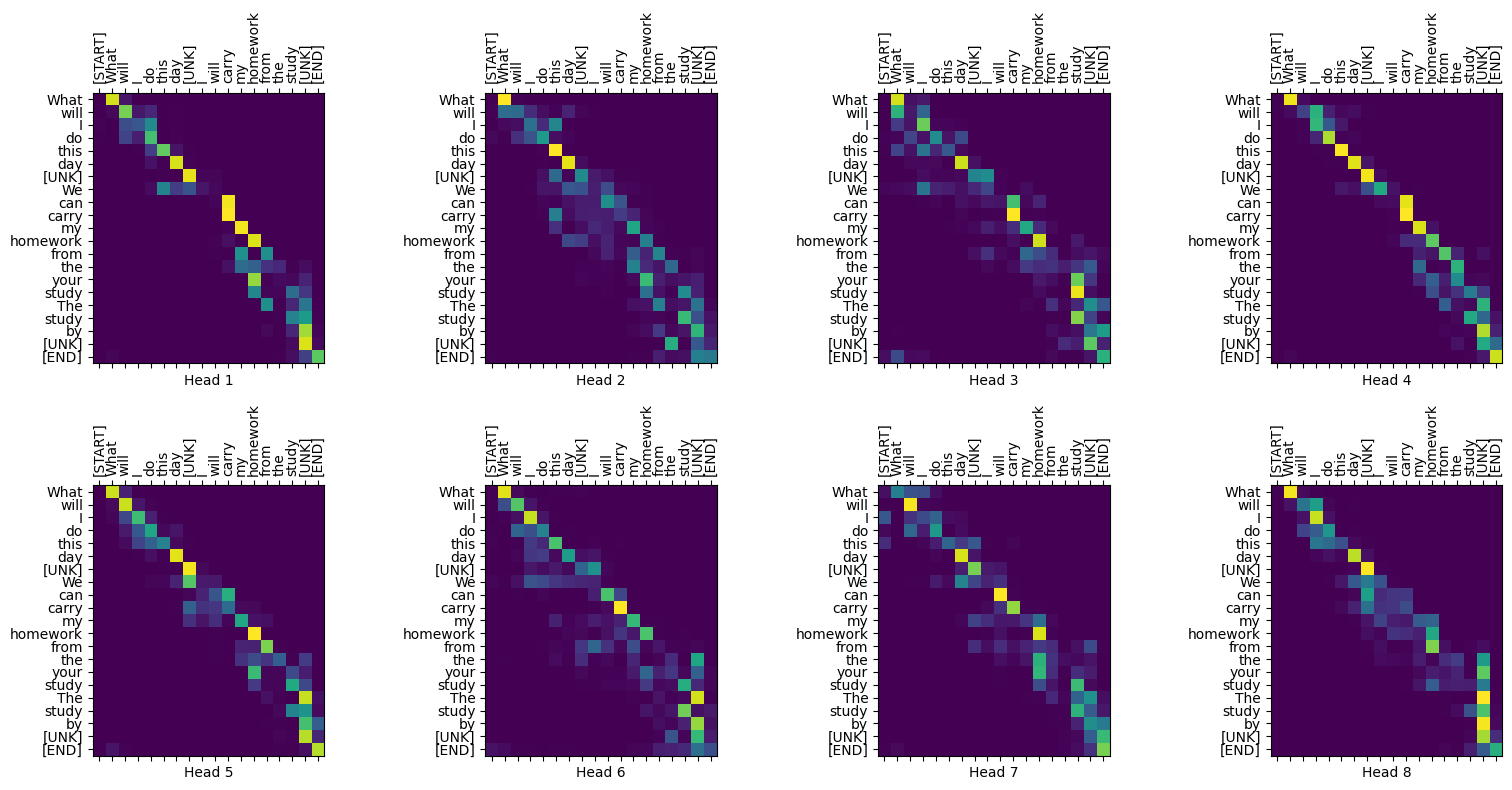

In [ ]:
plot_attention_weights(sentence,
                       translated_tokens,
                       attention_weights[0])

Input:         : What will I do this day ? I will carry my homework from the study .
Prediction     : What will I do this day [UNK] We can carry my homework from the your study The study by [UNK]
Ground truth   : What will I do today ? I will carry my homework from the study .


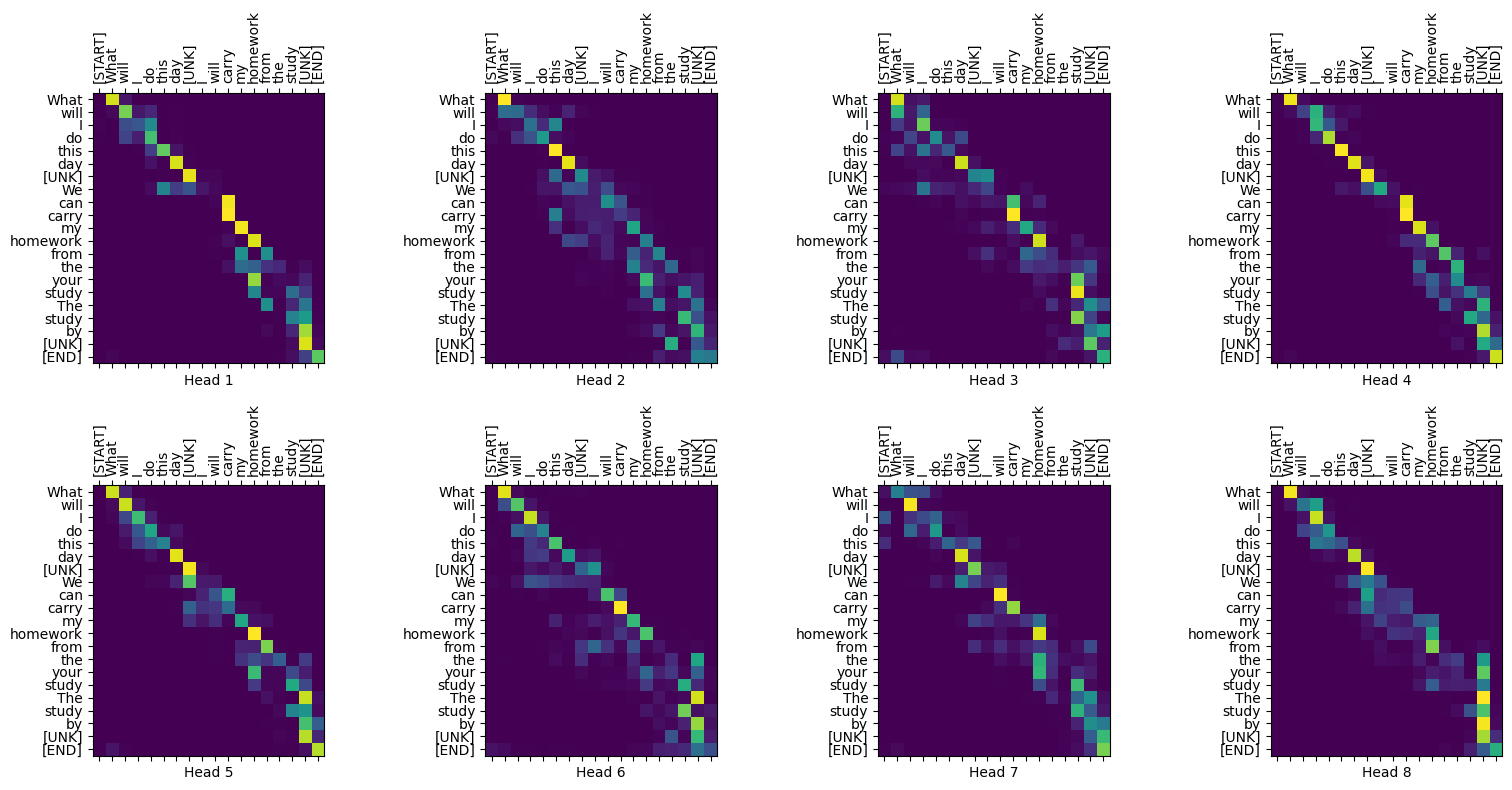

In [ ]:
sentence = 'What will I do this day ? I will carry my homework from the study .'
ground_truth = 'What will I do today ? I will carry my homework from the study .'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
class ExportTranslator(tf.Module):
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    (result,
     tokens,
     attention_weights) = self.translator(sentence, max_length=MAX_TOKENS)

    return result

In [ ]:
translator = ExportTranslator(translator)

In [ ]:
translator('I see it when I wake up , before I go to school , after I come back from school , before I eat supper , after I go out from the bath , and before I sleep in .').numpy()

b'I see it when I wake up [UNK] up [UNK] I go to school is where I can come back from school is set supper supper supper supper supper and I is'

In [ ]:
tf.saved_model.save(translator, export_dir='corrector')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:845: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ke

In [ ]:
reloaded = tf.saved_model.load('corrector')

In [ ]:
reloaded('He made an action which many other people could not .').numpy()

b'He made an action which many other than people could not be ready for [UNK]'